In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns   # for visualization
from sklearn import tree
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import string 
from scipy import stats # stats library
#from autoviz.AutoViz_Class import AutoViz_Class
import pandas_profiling # library for automatic EDA
from statsmodels.stats.weightstats import ztest # statistical library for hypothesis testing
import warnings
warnings.filterwarnings('ignore')

In [4]:
b1=pd.read_csv("C:/Users/Admin/Desktop/Data Science/Imarticus/Projects/Bank Credit card/BankCreditCard.csv")
b1=pd.DataFrame(b1)
display(b1.head(10))

,ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


In [5]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [29]:
repayment =['Repayment_Status_Jan','Repayment_Status_Feb','Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June']
bill = ['Jan_Bill_Amount','Feb_Bill_Amount','March_Bill_Amount','April_Bill_Amount','May_Bill_Amount','June_Bill_Amount']
payment = ['Previous_Payment_Jan','Previous_Payment_Feb','Previous_Payment_March','Previous_Payment_April','Previous_Payment_May','Previous_Payment_June']

In [30]:
b1[repayment].describe()

,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June
count,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.355200,0.319300,0.302967,0.25670,0.219500,0.224900
std,0.746984,0.796012,0.781792,0.74388,0.699954,0.700573
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000


In [31]:
b1[bill].describe()

,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,81581.060100,52517.103000,5.900389e+04,55122.263933,39939.618800,38506.051533
std,123026.372701,80401.365192,8.841747e+04,83577.329356,60373.934792,59104.280171
min,-365580.000000,-58777.000000,-2.572640e+05,-270000.000000,-81334.000000,-338603.000000
25%,3890.000000,3517.000000,2.876000e+03,2671.500000,1763.000000,1256.000000
50%,35661.500000,30538.000000,2.656800e+04,25629.000000,18043.000000,17071.000000
75%,67091.000000,57420.500000,6.025250e+04,54508.500000,50190.500000,48655.250000
max,964533.000000,883831.000000,2.664089e+06,992596.000000,827171.000000,861664.000000


In [32]:
b1[payment].describe()

,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000
mean,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567
std,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775
min,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000
50%,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000
75%,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000
max,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000


In [6]:
# Categorical variables description
b1[['Gender', 'Academic_Qualification', 'Marital']].describe()

,Gender,Academic_Qualification,Marital
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.855933,1.551867
std,0.489129,0.794397,0.521970
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [19]:
b1.Gender.value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

In [21]:
b1.Marital.value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

In [23]:
b1.Academic_Qualification.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

In [25]:
b1.isnull().sum()

ID                        0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

Number of Non Defaulter:  23364
Number of Defaulter :  6636


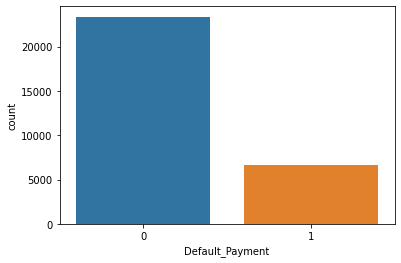

In [11]:
ax = sns.countplot(b1.Default_Payment,label="Count") 
NonDefaulter, Defaulter = b1.Default_Payment.value_counts()
print('Number of Non Defaulter: ', NonDefaulter)
print('Number of Defaulter : ',Defaulter)

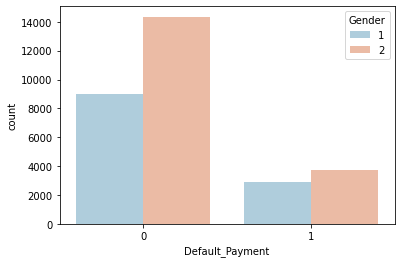

In [15]:
ax = sns.countplot(b1.Default_Payment,hue=b1.Gender,palette='RdBu_r') 

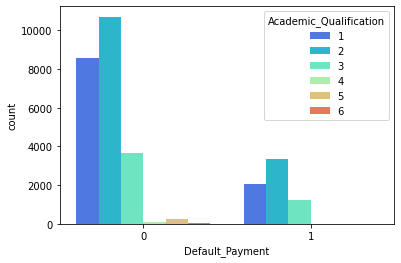

In [16]:
ax = sns.countplot(b1.Default_Payment,hue=b1.Academic_Qualification,palette='rainbow') 

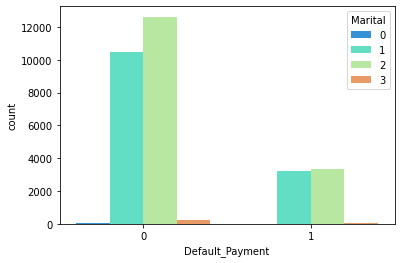

In [17]:
ax = sns.countplot(b1.Default_Payment,hue=b1.Marital,palette='rainbow') 

<AxesSubplot:>

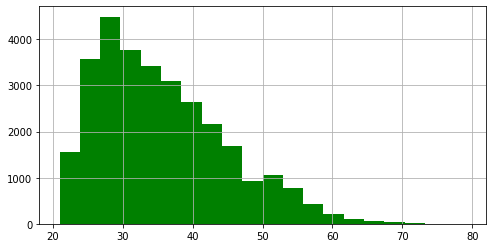

In [27]:
b1['Age_Years'].hist(color='green',bins=20,figsize=(8,4))

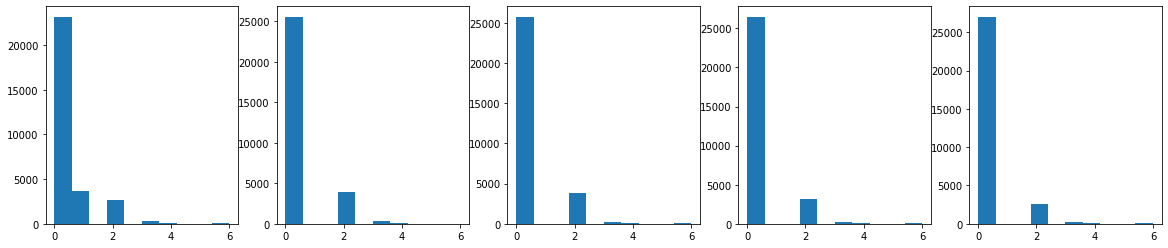

In [39]:
plt.figure(figsize=(20,4))
for r,c in zip(range(1,6),repayment): 
    plt.subplot(1,5,r)
    plt.hist(b1[c])

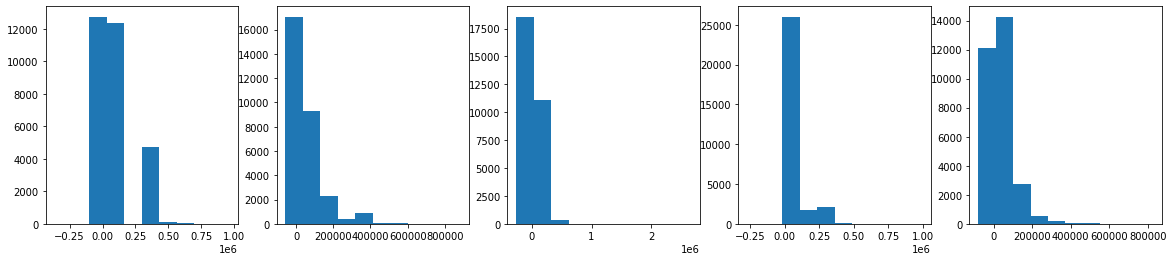

In [40]:
plt.figure(figsize=(20,4))
for r,c in zip(range(1,6),bill): 
    plt.subplot(1,5,r)
    plt.hist(b1[c])

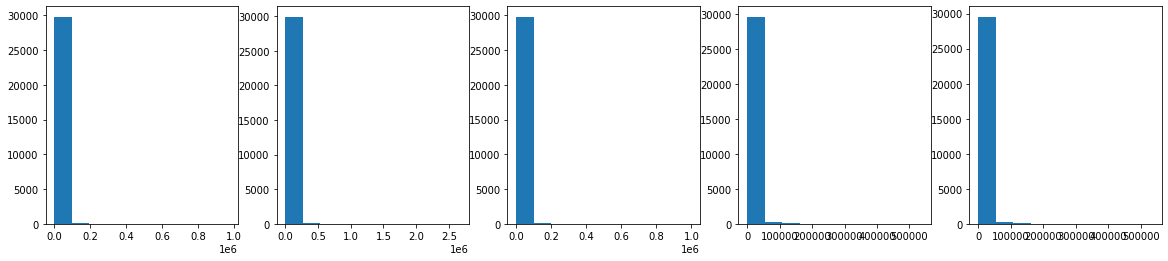

In [41]:
plt.figure(figsize=(20,4))
for r,c in zip(range(1,6),payment): 
    plt.subplot(1,5,r)
    plt.hist(b1[c])

Target looks like classification
Linear Discriminant Analysis training set score: 0.658


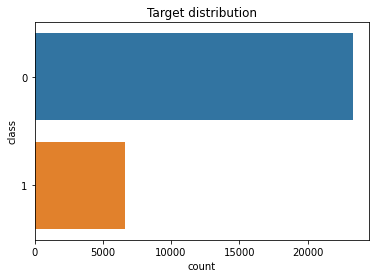

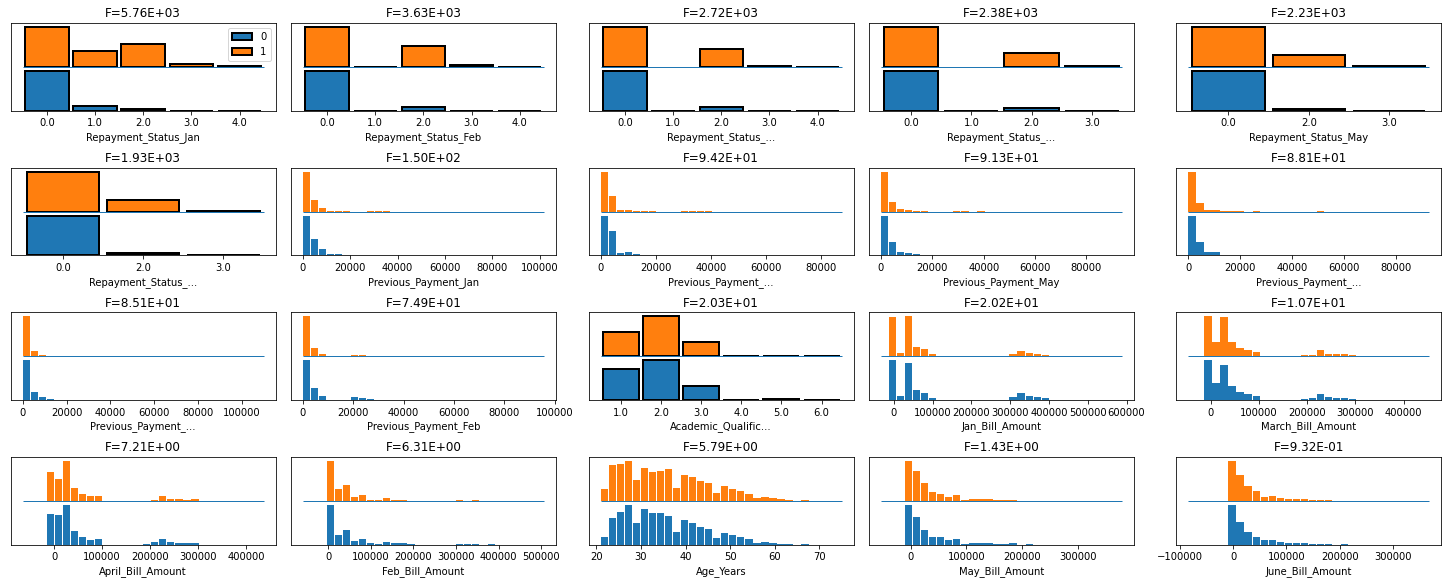

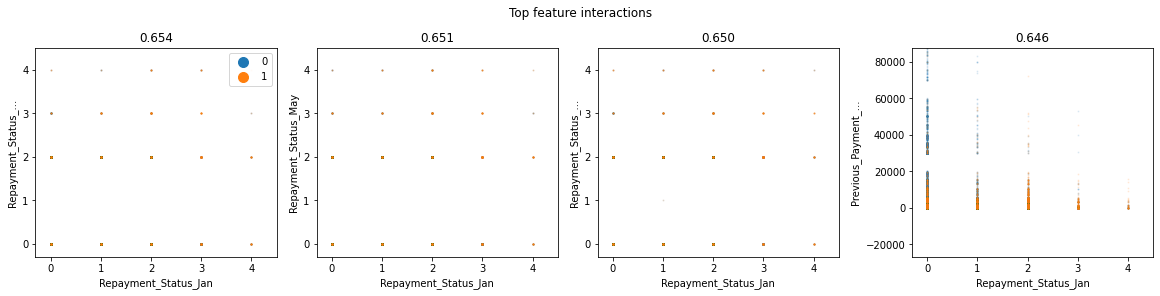

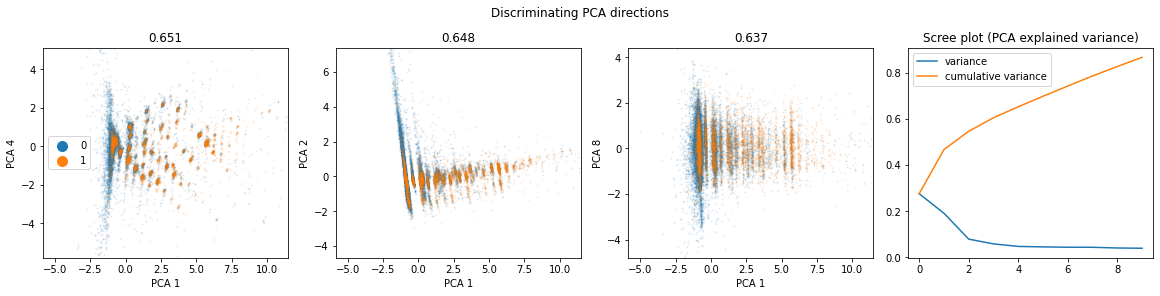

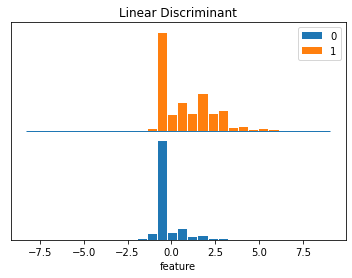

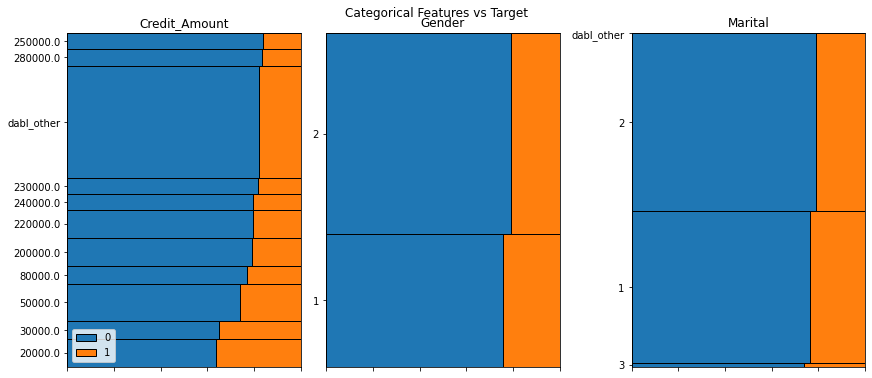

In [52]:
import dabl
dabl.plot(b1, 'Default_Payment')

In [53]:
# y includes our labels and x includes our features
y = b1.Default_Payment                         
x = b1.drop(['ID','Default_Payment'],axis = 1 )
x.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
0,20000.0,2,2,1,24,2,2,0,0,0,...,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0
1,220000.0,2,2,2,26,0,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,...,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Credit_Amount'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Academic_Qualification'),
  Text(3, 0, 'Marital'),
  Text(4, 0, 'Age_Years')])

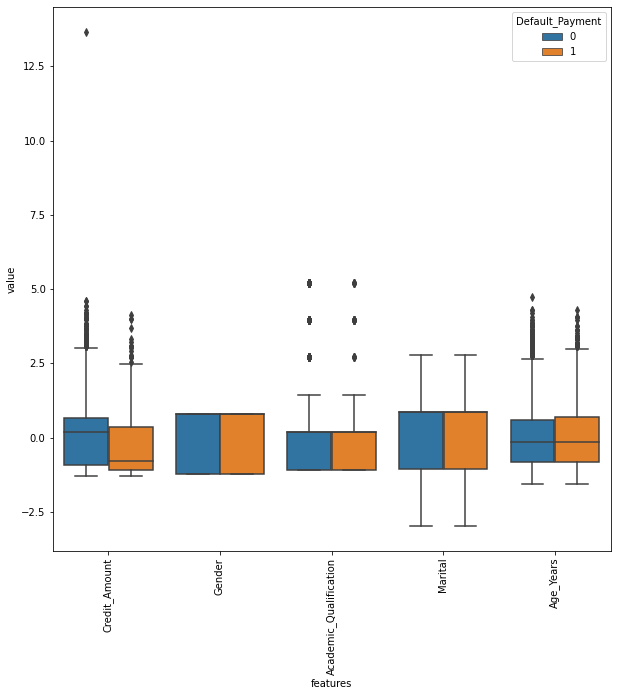

In [55]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:5]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Repayment_Status_Jan'),
  Text(1, 0, 'Repayment_Status_Feb'),
  Text(2, 0, 'Repayment_Status_March'),
  Text(3, 0, 'Repayment_Status_April'),
  Text(4, 0, 'Repayment_Status_May'),
  Text(5, 0, 'Repayment_Status_June')])

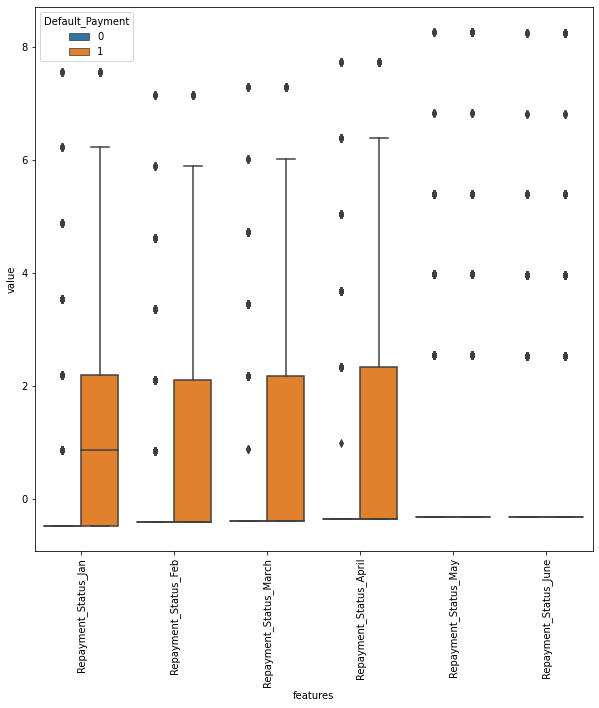

In [56]:
data = pd.concat([y,data_n_2.iloc[:,5:11]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Jan_Bill_Amount'),
  Text(1, 0, 'Feb_Bill_Amount'),
  Text(2, 0, 'March_Bill_Amount'),
  Text(3, 0, 'April_Bill_Amount'),
  Text(4, 0, 'May_Bill_Amount'),
  Text(5, 0, 'June_Bill_Amount')])

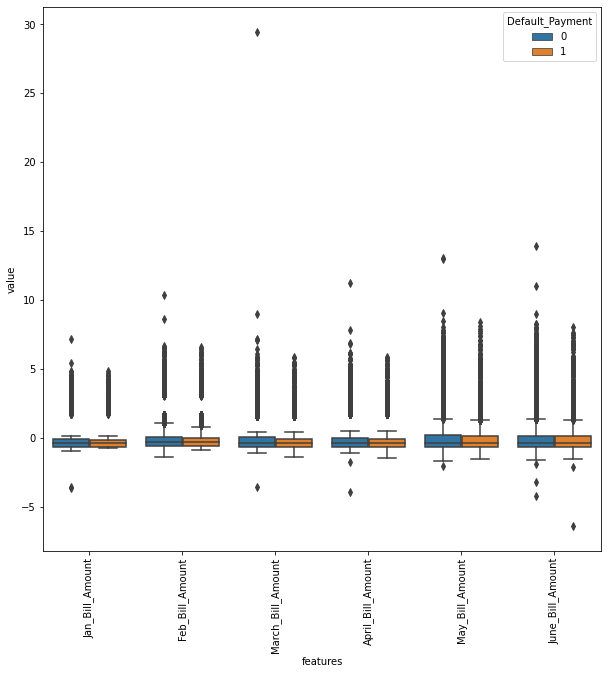

In [57]:
data = pd.concat([y,data_n_2.iloc[:,11:17]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Previous_Payment_Jan'),
  Text(1, 0, 'Previous_Payment_Feb'),
  Text(2, 0, 'Previous_Payment_March'),
  Text(3, 0, 'Previous_Payment_April'),
  Text(4, 0, 'Previous_Payment_May'),
  Text(5, 0, 'Previous_Payment_June')])

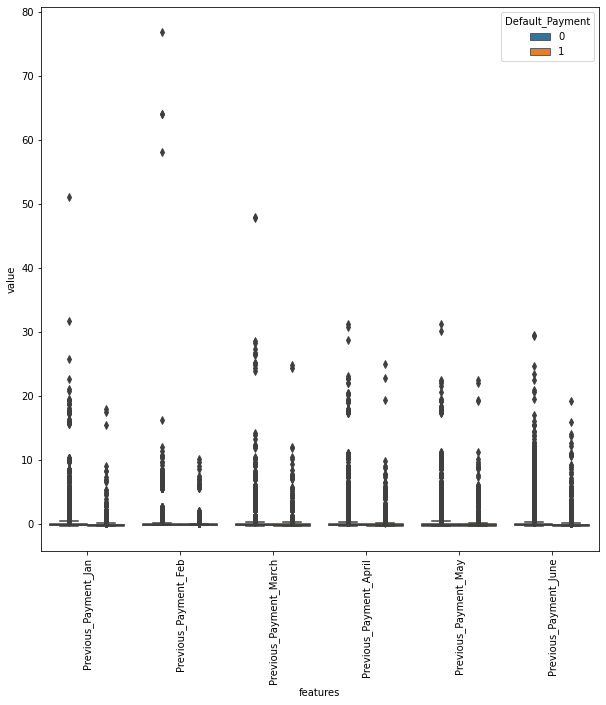

In [58]:
data = pd.concat([y,data_n_2.iloc[:,17:23]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

In [60]:
for col in x.columns:
    percentiles = x[col].quantile([0.01,0.90]).values
    x[col] = np.clip(x[col], percentiles[0], percentiles[1])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Credit_Amount'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Academic_Qualification'),
  Text(3, 0, 'Marital'),
  Text(4, 0, 'Age_Years')])

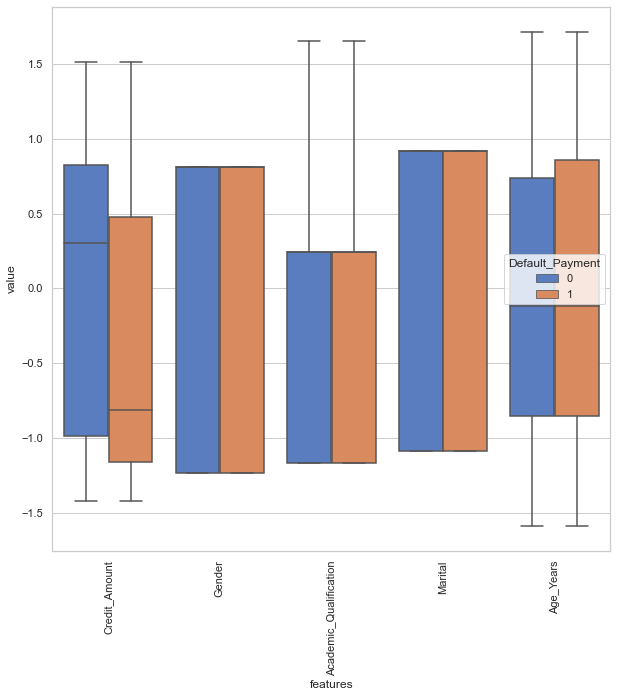

In [61]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:5]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Repayment_Status_Jan'),
  Text(1, 0, 'Repayment_Status_Feb'),
  Text(2, 0, 'Repayment_Status_March'),
  Text(3, 0, 'Repayment_Status_April'),
  Text(4, 0, 'Repayment_Status_May'),
  Text(5, 0, 'Repayment_Status_June')])

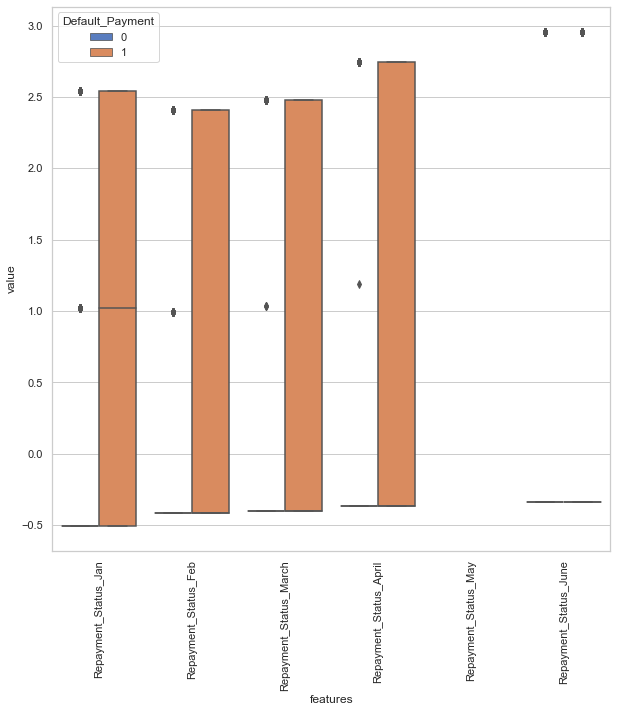

In [62]:
data = pd.concat([y,data_n_2.iloc[:,5:11]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Previous_Payment_Jan'),
  Text(1, 0, 'Previous_Payment_Feb'),
  Text(2, 0, 'Previous_Payment_March'),
  Text(3, 0, 'Previous_Payment_April'),
  Text(4, 0, 'Previous_Payment_May'),
  Text(5, 0, 'Previous_Payment_June')])

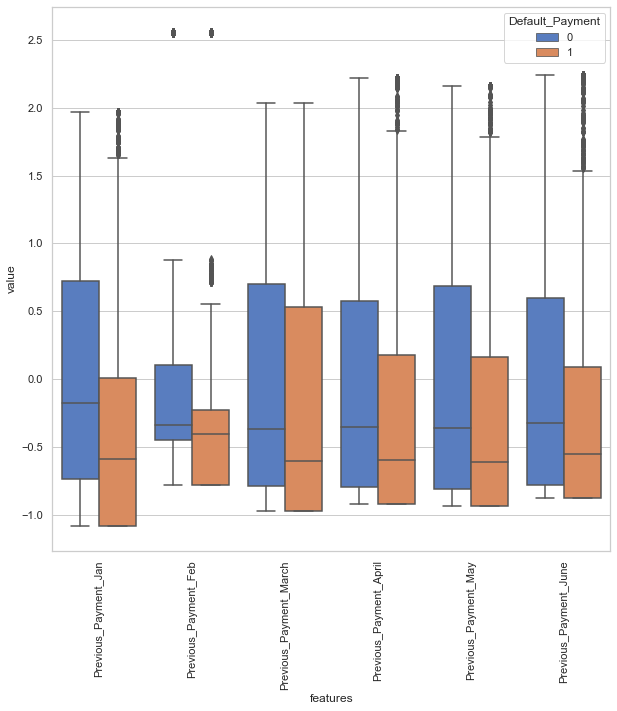

In [63]:
data = pd.concat([y,data_n_2.iloc[:,17:23]],axis=1)
data = pd.melt(data,id_vars="Default_Payment",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Default_Payment", data=data)
plt.xticks(rotation=90)

In [64]:
from sklearn.utils import resample
# Seperate Majority and Minority
ndefault = b1[b1['Default_Payment'] == 0]
default = b1[b1['Default_Payment'] == 1]

In [65]:
# Upsampling minority
from sklearn.utils import resample
default_upsample = resample(default,replace = True, n_samples = len(ndefault), random_state = 15)

In [66]:
# Combine majority and malignant_upsample
upsampled = pd.concat([ndefault, default_upsample])
upsampled = pd.DataFrame(upsampled)

1    23364
0    23364
Name: Default_Payment, dtype: int64


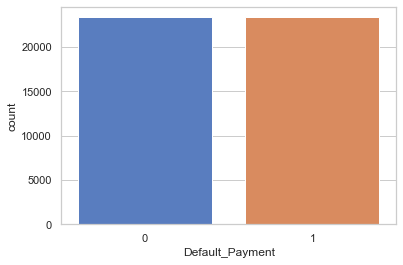

In [71]:
print(upsampled.Default_Payment.value_counts())
ax = sns.countplot(upsampled.Default_Payment,label="Count") 

In [69]:
from sklearn import preprocessing
# Get column names first
names = upsampled.columns
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(upsampled)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [72]:
# y includes our labels and x includes our features
Y = scaled_df.Default_Payment                         
X = scaled_df.drop(['ID','Default_Payment'],axis = 1 )
X.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
0,0.035354,1.0,0.2,0.666667,0.224138,0.0,0.0,0.0,0.0,0.0,...,0.096128,0.233117,0.105868,0.295060,0.001663,0.000935,0.001001,0.001856,0.001864,0.009458
1,0.015152,1.0,0.2,0.333333,0.275862,0.0,0.0,0.0,0.0,0.0,...,0.104936,0.237070,0.121289,0.305890,0.003081,0.000759,0.001201,0.002041,0.001992,0.001892
2,0.015152,0.0,0.2,0.333333,0.620690,0.0,0.0,0.0,0.0,0.0,...,0.100330,0.230430,0.109499,0.297212,0.003081,0.013713,0.010009,0.016701,0.001284,0.001284
3,0.015152,0.0,0.0,0.666667,0.275862,0.0,0.0,0.0,0.0,0.0,...,0.107783,0.237126,0.110018,0.298789,0.003697,0.001019,0.000658,0.001856,0.001864,0.001513
4,0.242424,0.0,0.0,0.666667,0.137931,0.0,0.0,0.0,0.0,0.0,...,0.240392,0.643637,0.621171,0.676889,0.067785,0.014957,0.059056,0.056298,0.025627,0.026047


<AxesSubplot:>

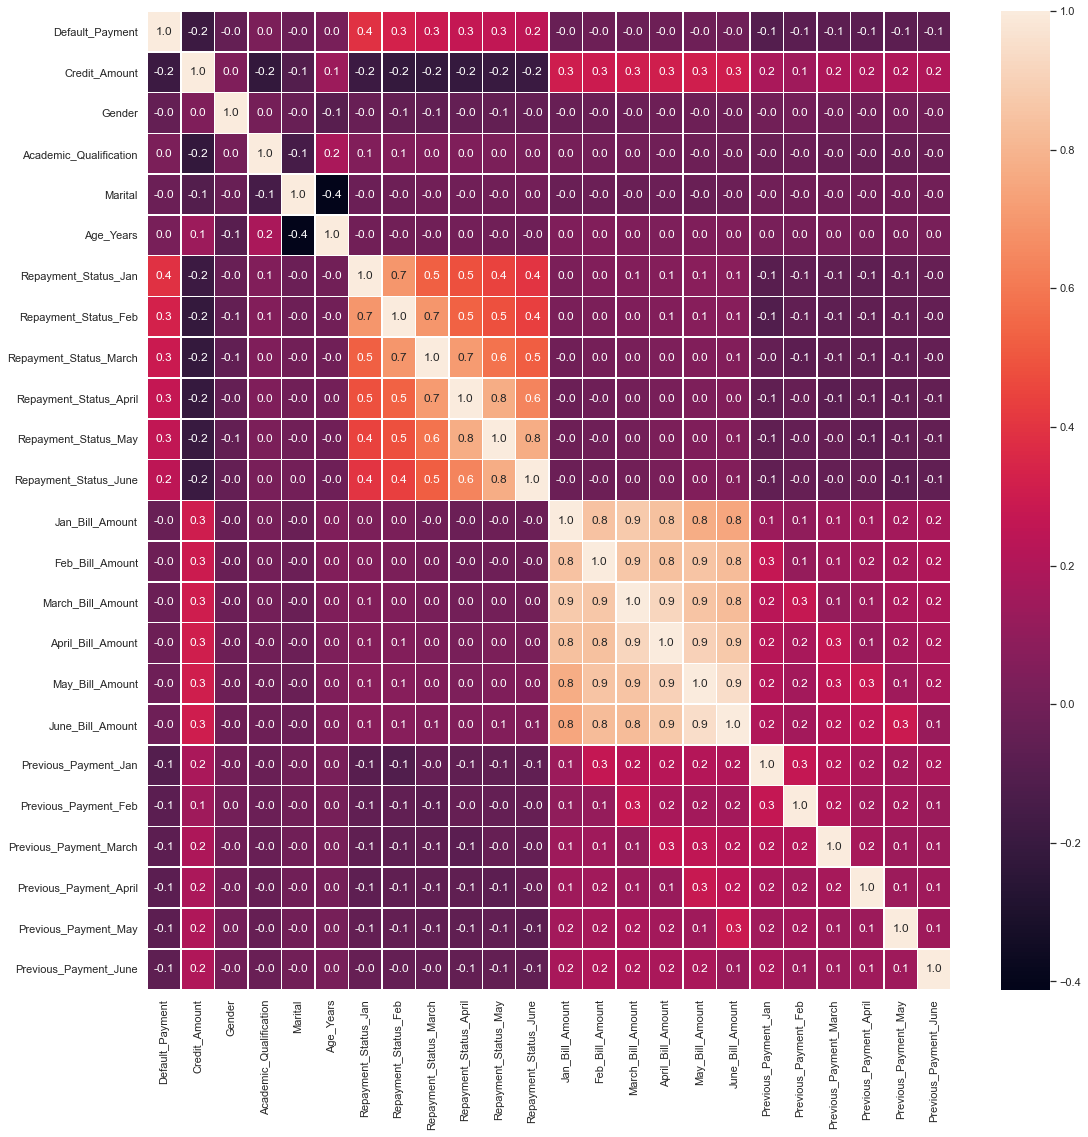

In [83]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
data = pd.concat([Y,X],axis=1)
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

32709
32709
14019
14019


In [74]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.9284542406733719


<AxesSubplot:>

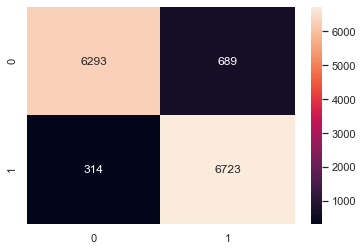

In [75]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [6.46267533e+01 2.68539940e+01 4.86593697e+00 1.27090357e+00
 1.73171662e+00 1.22933518e+03 1.07730211e+03 8.98535365e+02
 8.47611035e+02 8.19064710e+02 7.24317541e+02 8.36757237e-01
 6.93766301e-01 1.32139521e-01 1.71804664e-01 9.28941490e-02
 1.92049614e-02 1.63628274e+01 8.52125660e+00 1.01872702e+01
 1.72531734e+01 1.73048140e+01 1.57853881e+01]
Feature list: Index(['Credit_Amount', 'Gender', 'Academic_Qualification', 'Marital',
       'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June'],
      dtype='object')


Accuracy is:  0.8569084813467437


<AxesSubplot:>

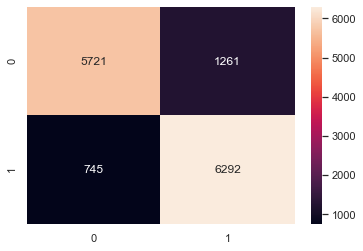

In [79]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Feature ranking:
1. feature 5 (0.092518)
2. feature 11 (0.066362)
3. feature 4 (0.066153)
4. feature 12 (0.059263)
5. feature 0 (0.057912)
6. feature 13 (0.055384)
7. feature 17 (0.053788)
8. feature 14 (0.053077)
9. feature 15 (0.052685)
10. feature 16 (0.052614)
11. feature 18 (0.050579)
12. feature 19 (0.049733)
13. feature 22 (0.047125)
14. feature 20 (0.046678)
15. feature 21 (0.044961)
16. feature 6 (0.033530)
17. feature 7 (0.025870)
18. feature 2 (0.020872)
19. feature 8 (0.018312)
20. feature 10 (0.014978)
21. feature 3 (0.012926)
22. feature 9 (0.012767)
23. feature 1 (0.011913)


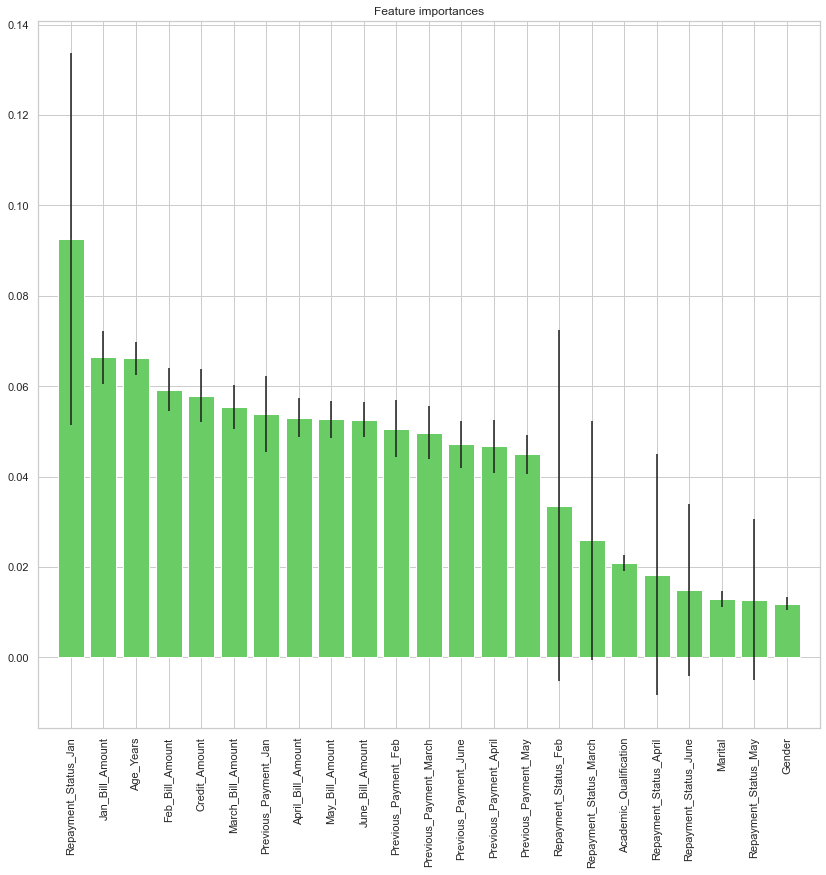

In [82]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Minimum error:- 0.13082245523931807 at K = 1


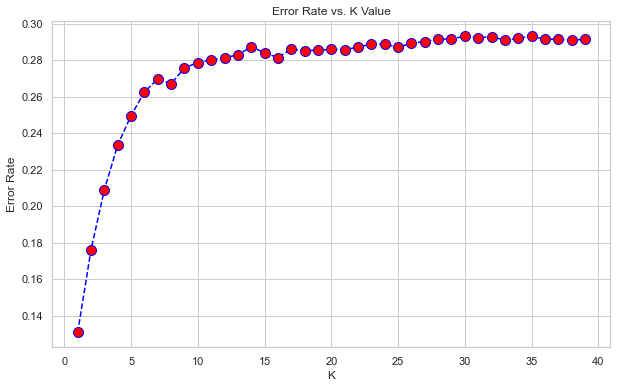

In [86]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy is:  0.869177544760682


<AxesSubplot:>

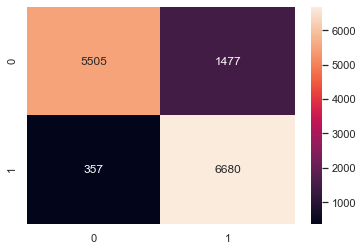

In [89]:
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
yhat = neigh.predict(X_test)
ac_3 = accuracy_score(y_test,yhat)
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(y_test,yhat)
sns.heatmap(cm_3,annot=True,fmt="d")

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6982
           1       0.82      0.95      0.88      7037

    accuracy                           0.87     14019
   macro avg       0.88      0.87      0.87     14019
weighted avg       0.88      0.87      0.87     14019



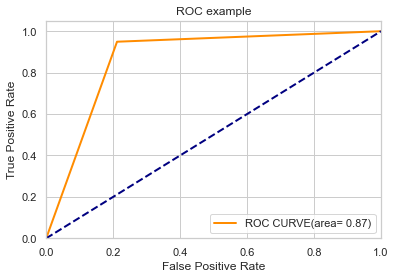

In [91]:
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,yhat)
fpr1
tpr1
df1=pd.DataFrame(dict(fpr=fpr1,tpr=tpr1))
auc=metrics.auc(fpr1,tpr1)
plt.figure()
lw=2
plt.plot(fpr1,tpr1,color='darkorange',lw=lw,label='ROC CURVE(area= %0.2f)'% auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc='lower right')
plt.show()

Accuracy is:  0.6873528782366788


<AxesSubplot:>

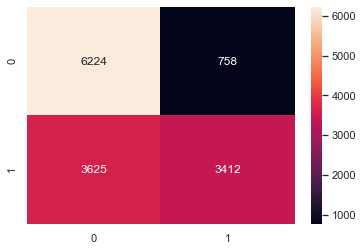

In [93]:
from sklearn import svm
from sklearn.svm import SVC
svcT=svm.SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(X_train,y_train)
yhat = svcT.predict(X_test)
ac_4 = accuracy_score(y_test,yhat)
print('Accuracy is: ',ac_4)
cm_4 = confusion_matrix(y_test,yhat)
sns.heatmap(cm_4,annot=True,fmt="d")

In [94]:
print(classification_report(y_test,svcT.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.63      0.89      0.74      6982
         1.0       0.82      0.48      0.61      7037

    accuracy                           0.69     14019
   macro avg       0.73      0.69      0.67     14019
weighted avg       0.73      0.69      0.67     14019



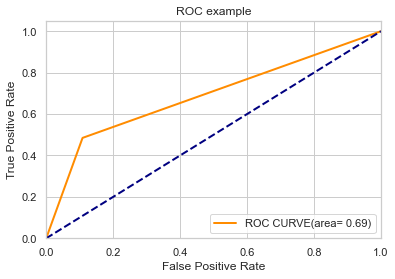

In [95]:
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,yhat)
fpr1
tpr1
df1=pd.DataFrame(dict(fpr=fpr1,tpr=tpr1))
auc=metrics.auc(fpr1,tpr1)
plt.figure()
lw=2
plt.plot(fpr1,tpr1,color='darkorange',lw=lw,label='ROC CURVE(area= %0.2f)'% auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc='lower right')
plt.show()